<a href="https://colab.research.google.com/github/raqueeb/TensorFlow2/blob/master/similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## শব্দের সিমিলারিটি, কাছাকাছি অর্থ, লাইকলিহুড - সঙ্গে ফাস্টটেক্সট এবং ওয়ার্ড২ভেক

যেহেতু ভাষা একটা ‘কমপ্লেক্স’ জিনিস, সেকারণে ডিপ লার্নিং অ্যাপ্লিকেশনে এই এই কমপ্লেক্সিটির  সমস্যাগুলোকে কাটিয়ে ওঠার জন্য এই জিনিসটা আমাদের কাজের একটা ভালো ক্যান্ডিডেট। প্রতিটা শব্দের সাথে আরেকটা শব্দের সম্পর্ক এবং তার সিমিলারিটি অথবা সেই শব্দের সাথে কাছাকাছি শব্দগুলো কোন ডাইমেনশনে আছে সেটাও একটা ভালো দেখার বিষয়। যখন ‘ন্যাচারাল ল্যাঙ্গুয়েজ প্রসেসিং’ বোঝা শুরু করলাম, তখন বাংলায় এই ব্যাপারটা একদম অনুপস্থিত ছিল। বাংলায় এখনো কাজ দেখা কঠিন। এর পাশাপাশি শব্দ সিমিলারিটি অথবা কোন শব্দের কাছাকাছি কতগুলো শব্দ কাজ করছে, অথবা লিংক প্রেডিকশন - সেগুলো দেখার মত সেরকম রিসোর্স এখনো কম। তবে ডিপ লার্নিং অ্যাপ্লিকেশন আসার পর থেকে দু বাংলায় আমাদের ভাষা নিয়ে কাজ শুরু হয়েছে। কিছু রিসার্চ পেপার পাওয়া যায় তবে সেগুলোর ডাটাসেট সেভাবে উন্মুক্ত নয়। কেউ যদি কোনো কাজ শুরু করতে চায়, তাকে কেঁচে গণ্ডূষ করে শুরু করতে হবে। সে দিক থেকে আমাদের জন্য এই প্রি-ট্রেইনড মডেলই ভালো।

পাইথনের জন্য ‘স্পেসি’ এর মতো খুব ভালো দুটো এপ্লিকেশন আছে আমাদের হাতে। সেখানে ‘এনএলটিকে’ পুরনো হলেও ‘স্পেসি’ বেশ কাজের। তবে এ মুহূর্তে ‘স্পেসি’ এর বাংলা মডিউলটা আপডেট না থাকাতে সেটা কিছুটা কম্প্যাটিবিলিটি সমস্যায় আছে। সে কারণে আমরা ফিরে যাচ্ছি ওয়ার্ল্ড২ভেক এবং ফাস্টটেক্সটে। দুটো মডেল অবাক করার মতো। এ দুটো প্রি-ট্রেইনড মডেল অনেক বড় হলেও এর কাজকে দেখানোর জন্য বেশ কিছু ‘প্রি-প্রসেসিং’ আগে থেকে করে রাখা হয়েছে। ‘প্রি-প্রসেসিং’ একাই একটা আলাদা জগত, তবে সেটা ‘ডিপ লার্নিং’ এর মত ততটা কমপ্লেক্স নয়। আমি ধারণা করি কাজ করতে করতে প্রি-প্রসেসিং শিখে যাবেন আপনি। 

আমরা যেহেতু অল্প সল্প ন্যাচারাল ল্যাংগুয়েজ প্রসেসিং নিয়ে কাজ করছি, শব্দগুলোর ‘সিমিলারিটি’ এবং কাছাকাছি অর্থ এবং রিপ্রেজেন্টেশন পাশাপাশি হওয়াতে আমরা কিছু কাজ দেখাতে পারি। আমাদের একটা টার্গেট শব্দ থাকলে ওই শব্দটাকে ঘিরে যে পাশাপাশি একই ধরনের শব্দগুলো আছে সেগুলোকে খালি চোখে দেখলে কিন্তু বিশ্বাস হবে। নিউরাল নেটওয়ার্কের হিডেন লেয়ারগুলো যেহেতু আমাদের শব্দ রিপ্রেজেন্টেশনকে এনকোড করে, সে কারণে আমরা এই ন্যাচারাল ল্যাংগুয়েজ প্রসেসিং অ্যাপ্লিকেশনকে অনেকটাই ছেড়ে দিচ্ছি নিউরাল নেটওয়ার্কের ওপর। এই দুটোকে আবার কনভার্জ করার জন্য দরকার কিছু বিশেষায়িত ফ্রেমওয়ার্ক। এর জন্য একটা ভালো ফ্রেমওয়ার্ক হচ্ছে ‘জেনসিম’। আসলেইএকটা অসাধারণ ফ্রেমওয়ার্ক। তবে, শুরুতেই ‘ওয়ার্ড২ভেক’। মানে ওয়ার্ড টু ভেক্টর। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/similar.png"> চিত্রঃ কাছাকাছি অর্থ এবং রিপ্রেজেন্টেশন

## স্কিপ-গ্রাম

বেশি কমপ্লেক্সিটিতে না যেয়ে বলতে পারি ওয়ার্ড২ভেক দুভাবে কাজ করে। একটাকে আমরা বলি স্কিপ-গ্রাম, মানে যার কাজ হচ্ছে বাক্যের কনটেক্সট প্রেডিক্ট করে শব্দ নিয়ে কাজ করা। এদিকে আরেকটা হচ্ছে  ‘কন্টিনিউয়াস ব্যাগ অফ ওয়ার্ডস’। স্কিপ-গ্রাম এ আমাদের টার্গেট শব্দ যখন ইনপুট হিসেবে দেওয়া হয় - তখন তার আশেপাশের টার্গেট শব্দগুলো হচ্ছে আউটপুট। উদাহরণ হিসেবে বলা যায় একটা বাক্য, - “আমি এখন বই পড়ছি”, এর ইনপুট শব্দ যদি “বই” হয়, তাহলে তার আউটপুট হবে “আমি” “এখন”, এবং “পড়ছি”। আমাদের এখানে উইন্ডো সাইজ হচ্ছে ৪। এখানে ইনপুট এবং আউটপুট ডাটা একই ডাইমেনশনে থাকবে, অবশ্যই ‘ওয়ান হট এনকোডিং’ এ থাকবে। এই নেটওয়ার্কে একটা হিডেন লেয়ার যার ডাইমেনশন সমান হবে ‘এম্বেডিং সাইজ এর উপর, - যা আসলে ইনপুট এবং আউটপুট ভেক্টর সাইজের ছোট হবে। আউটপুট লেয়ার এর শেষে একটা ‘সফটম্যাক্স’ অ্যাক্টিভেশন ফাংশন প্রতিটা আউটপুট ফ্যাক্টরের এলিমেন্ট গুলোর উপর অ্যাপ্লাই করা থাকবে যাতে প্রবাবিলিটি ডিস্ট্রিবিউশনে ‘লাইকলিহুড’ মানে কন্টেক্সটুয়ালের কাছাকাছি শব্দগুলো আসবে এখানে।

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/skip.png"> চিত্রঃ ইনপুট লেয়ার থেকে আউটপুট লেয়ারে 

আবার, আমাদের স্কিপ-গ্রামে ভোকাবুলারি সাইজ থেকে তার রিপ্রেজেন্টেশন ডাইমেনশন কমে আসে হিডেন লেয়ারে। পাশাপাশি আমাদের ভেক্টরগুলো অনেকটাই অর্থবহ হয় যখন শব্দগুলোর মধ্যে অংকের রিলেশনশিপ বা সম্পর্ককে ঠিকমতো বুঝতে পারি। একটা শব্দ থেকে আরেকটা শব্দকে যোগ অথবা বিয়োগ এব্যাপারগুলো বোঝা যাবে যখন আমরা সেগুলো এখন হাতে কলমে দেখব। এখানে একটা ছবি দেখুন।

## ‘কন্টিনিউয়াস ব্যাগ অফ ওয়ার্ডস’

ওয়ার্ড২ভেক এর আরেকটা ধারণা হচ্ছে ‘কন্টিনিউয়াস ব্যাগ অফ ওয়ার্ডস’, যা অনেকটাই স্কিপ-গ্রাম এর মত তবে এটা ইনপুট এবং আউটপুটকে পাল্টে দেয়। ব্যাপারটা এরকম, আমরা একটা ‘কন্টেক্সট’ দেবো সেখানে আমরা জানতে চাইব কোন শব্দটার সবচেয়ে বেশি ‘লাইকলিহুড’ অথবা ‘প্রবাবিলিটি’ থাকবে সবার আগে আসার। এই দুটো সিস্টেমের মধ্যে সবচেয়ে বড় পার্থক্য হচ্ছে যেভাবে শব্দের ভেক্টরগুলো জেনারেট হয়। ‘কন্টিনিউয়াস ব্যাগ অফ ওয়ার্ডে’ টার্গেট শব্দের সব উদাহরণগুলো নেটওয়ার্কে ফিড করানো হয় যা আসলে সেগুলোর গড় করে হিডেন লেয়ার থেকে এক্সট্রাক্ট করে। আমাদের সব ধরনের বাক্যের মধ্যে কিভাবে গড় করা যায় সেটা বের করা খুব একটা সমস্যা নয়। একটা ছবি দেখি। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/cbow.png"> চিত্রঃ ইনপুট লেয়ার থেকে আউটপুট লেয়ারে কমে আসছে

এগুলো না বুঝলে সমস্যা নেই, কারণ সবকিছুই দেখব হাতে-কলমে সামনে। শুরুতে বেশকিছু প্রি-প্রসেসিং ব্যবহার করে যতিচিহ্ন, ইমোজি, ম্যাপ সিম্বল, স্পেশাল ক্যারেক্টার, ফেলে দেয়া হয়েছে ভালোভাবে বোঝার জন্য। এগুলো রেগুলার এক্সপ্রেশন এর কাজ। 

In [0]:
import re
import os
import glob
import string

## দুটো মডেল দেখি 'জেনসিম' ফ্রেমওয়ার্ক দিয়ে
from gensim.models import Word2Vec
from gensim.models import FastText

আমাদের এই টেক্সট ফাইলটা দেখে নিতে পারেন। প্রতিটা লাইনে একটা করে বাংলা বাক্য আছে। বাংলা উইকিপিডিয়া থেকে নেয়া। প্রি-প্রসেসিং করে নিয়েছি আগেই। এখানে সহায়তা দিয়েছেন তারেক আল মুনতাসির।

In [32]:
!wget https://media.githubusercontent.com/media/raqueeb/datasets/master/bnwiki-texts.zip

--2019-11-02 12:45:00--  https://media.githubusercontent.com/media/raqueeb/datasets/master/bnwiki-texts.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61696513 (59M) [application/zip]
Saving to: ‘bnwiki-texts.zip.1’

bnwiki-texts.zip.1  100%[===================>]  58.84M   159MB/s    in 0.4s    

2019-11-02 12:45:01 (159 MB/s) - ‘bnwiki-texts.zip.1’ saved [61696513/61696513]



In [33]:
!ls -al

total 469564
drwxr-xr-x 1 root root      4096 Nov  2 12:45 .
drwxr-xr-x 1 root root      4096 Nov  2 11:24 ..
-rw-r--r-- 1 root root 357413194 Oct 31 16:38 bnwiki-texts-preprocessed.txt
-rw-r--r-- 1 root root  61696513 Nov  2 11:30 bnwiki-texts.zip
-rw-r--r-- 1 root root  61696513 Nov  2 12:45 bnwiki-texts.zip.1
drwxr-xr-x 1 root root      4096 Oct 30 15:14 .config
drwxr-xr-x 1 root root      4096 Oct 25 16:58 sample_data


In [34]:
!unzip bnwiki-texts.zip

Archive:  bnwiki-texts.zip
replace bnwiki-texts-preprocessed.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
# বাড়তি ওয়ার্নিং ফেলে দিচ্ছি, আপনাদের কাজের সময় লাগবে না 
import warnings
warnings.filterwarnings("ignore")

In [0]:
preprocessed_text_file_path = 'bnwiki-texts-preprocessed.txt'

In [0]:
lines_from_file = []
with open(preprocessed_text_file_path, encoding='utf8') as text_file:
    for line in text_file:
        lines_from_file.append(line)

কতগুলো লাইন আছে এই ফাইলে?

In [38]:
len(lines_from_file)

1363435

আমাদের জেনসিম ওয়ার্ড২ভেক এবং ফাস্টটেক্সট শব্দের লিস্ট আশা করে একেকটা বাক্য/প্রতিটা লাইনে। যেমন, [["আমি", "এখন", "বইটি", "পরছি"],["বইটি", "অনেক", "ভাল"]]


In [0]:
tokenized_lines = []
for single_line in lines_from_file:
    tokenized_lines.append(single_line.split())

In [40]:
print(len(tokenized_lines))

1363435


In [41]:
print(tokenized_lines[0])

['বাংলা', 'ভাষা', 'বাংলা', 'ভাষা', 'বাংলা', 'ভাষা', 'বাঙলা', 'বাঙ্গলা', 'তথা', 'বাঙ্গালা', 'নামগুলোতেও', 'পরিচিত', 'একটি', 'ইন্দো', 'আর্য', 'ভাষা', 'যা', 'দক্ষিণ', 'এশিয়ার', 'বাঙালি', 'জাতির', 'প্রধান', 'কথ্য', 'ও', 'লেখ্য', 'ভাষা']


In [0]:
# শুরুর মডেল ওয়ার্ড২ভেক, ৫ থেকে ১০ মিনিট লাগতে পারে

model = Word2Vec(tokenized_lines, size=200, window=5, min_count=10)

In [0]:
# পরের মডেল ফাস্টটেক্সট, এখানে একই সময় বা কিছুটা বেশি

fasttext_model = FastText(tokenized_lines, size=200, window=5, min_count=10)

In [44]:
# model.wv মানে মডেলের ওয়ার্ড ভেক্টর 
# ('বাংলা') এর বিশাল ডাইমেনশন
vector_a = fasttext_model.wv.get_vector('বাংলা')
print(vector_a)

[ 1.8976768  -1.0283476  -2.3179123   0.894449    0.26044163  3.253422
  1.4631258  -1.9518905   0.1338212  -0.57786185  1.6881678   1.7342311
 -1.4105695  -1.0809054  -2.758268    1.6006068  -2.3383946   1.9454056
 -1.1903195   0.6280069  -1.4375675   1.8572727   0.9820003  -1.3024262
  1.65321    -2.0364046   0.01969525 -0.8619723  -2.6683614  -0.17731783
  0.7117109  -0.30478525 -0.6641147   0.06318939 -0.1608553  -3.2404416
  1.530783    3.2347832  -0.06098805 -0.05757014  1.2689914  -1.7840327
  0.9527659  -0.39781514 -0.3459056   0.39708158  1.0105048  -2.181751
 -2.518669   -0.71068674 -3.4187157  -3.2913442   0.9946782   3.2998984
  0.77294064  0.29501194 -0.08335235 -1.1216378  -0.35344216 -1.9213797
  0.0750849   0.9972085  -2.1898801   0.8415833  -1.7253236  -1.2651783
 -2.585369    1.4128845  -0.4154387  -0.06313945 -0.02827391 -1.1165198
 -0.35400993 -1.2261149  -2.3683646  -0.940044    2.2586162  -1.4265448
 -0.30330917  2.226348    0.94891256 -1.6886786   0.19585437  2.3

In [45]:
# শুরুতে ওয়ার্ড২ভেক ব্যবহার করছি, model এসেছে  ওয়ার্ড২ভেক
print("ছেলে শব্দটার সবচেয়ে কাছাকাছি শব্দ কি?")
model.wv.most_similar('ছেলে', topn=5)

ছেলে শব্দটার সবচেয়ে কাছাকাছি শব্দ কি?


[('মেয়ে', 0.8694950938224792),
 ('বোন', 0.7760161757469177),
 ('ভাই', 0.7580657005310059),
 ('কন্যা', 0.7088349461555481),
 ('নাতি', 0.7041655778884888)]

আমার পছন্দ ফাস্টটেক্সট, দেখি তাদের রেজাল্ট। 

In [46]:
print("ফাস্টটেক্সট উদাহরণ: ছেলে শব্দটার সবচেয়ে কাছাকাছি শব্দ কি?")
fasttext_model.wv.most_similar('ছেলে', topn=5)

ফাস্টটেক্সট উদাহরণ: ছেলে শব্দটার সবচেয়ে কাছাকাছি শব্দ কি?


[('ছেলেমেয়ে', 0.8542008399963379),
 ('ছেলেরাই', 0.7867826223373413),
 ('মেয়ে', 0.7792433500289917),
 ('ছেলেটা', 0.7645769715309143),
 ('ছেলেবন্ধু', 0.7601621747016907)]

In [47]:
print("এখানে দেখি, বাবা + মেয়ে - ছেলে =?")
model.wv.most_similar(positive=['বাবা', 'মেয়ে'], negative=['ছেলে'], topn=5)

এখানে দেখি, বাবা + মেয়ে - ছেলে =?


[('মা', 0.6970036029815674),
 ('পিতা', 0.6415684223175049),
 ('বান্ধবী', 0.6146530508995056),
 ('পিতামাতা', 0.6120995283126831),
 ('দাদা', 0.599113941192627)]

In [48]:
print(model.wv['বাংলাদেশ'])

[ 1.3213822  -0.725589    0.21489498 -0.37031797  0.6816253   0.8505991
  0.2872284  -0.9896753  -0.8152686  -0.58948314 -0.2641894  -2.3667927
  0.21350844 -1.2798101   2.1240401   1.8014475   1.0261875   0.5713888
 -1.4275507   0.95295763  0.703823    0.4282073   0.53458375 -0.8135764
 -3.1111107   1.3118656   0.38564405 -0.25606006  1.2277287   3.2447453
  0.3704297  -0.38716105  0.17537421 -0.23364852 -1.6882356   1.1702828
  2.0558832   1.5994655   0.58607614 -0.09936041  0.68633044 -1.4682317
  2.5490592   2.2228658   0.10901821 -0.9449868  -1.9227288  -0.54931885
 -0.72960126  0.911923    3.0406678  -0.19861048 -1.3494688  -0.91734123
  1.2387315   0.76121265 -2.6574032  -2.0543008   1.0616969   2.2712185
  1.1780199  -0.33887085  0.17532052  2.2621596  -0.92108786  0.87107986
 -3.524013    1.2334946  -0.2332995   1.1960253  -0.52509546  2.8242807
 -1.2358137   1.2926817  -0.89907104  1.980359   -2.147392    0.19723862
  1.9128809  -0.7830357   2.5211523  -0.6414952   2.5306408 

In [49]:
print('এখানে কোন শব্দটা যাচ্ছে না বাকিদের সাথে?')
model.wv.doesnt_match("ঢাকা রাজশাহী রংপুর নজরুল".split())

এখানে কোন শব্দটা যাচ্ছে না বাকিদের সাথে?


'নজরুল'

In [50]:
print(model.wv.similarity('শিক্ষা', 'শিক্ষিত'))

0.39234614


In [51]:
semantically_similar_words = {words: [item[0] for item in model.wv.most_similar([words], topn=5)]
                  for words in ['বাংলা', 'মাতা', 'একুশে', 'ভাষা', 'আনন্দ', 'আকাশ']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

বাংলা:['অসমীয়া', 'বাংলার', 'বাঙলা', 'সাঁওতালি', 'হিন্দী']
মাতা:['জন্মনাম', 'পিতা', 'পিতামহ', 'দাদী', 'মাতার']
একুশে:['গ্রন্থমেলায়', 'গ্রন্থমেলা', 'মরণোত্তর', 'বইমেলায়', 'অনন্যা']
ভাষা:['ভাষার', 'ভাষাটি', 'ভাষাকে', 'ভাষাও', 'উপভাষা']
আনন্দ:['আরতি', 'সুখ', 'অনন্ত', 'অমৃত', 'ভালোবাসা']
আকাশ:['আকাশের', 'সূর্য', 'আঁধার', 'মেঘ', 'মেঘলা']


In [52]:
semantically_similar_words = {words: [item[0] for item in fasttext_model.wv.most_similar([words], topn=5)]
                  for words in ['বাংলা', 'মাতা', 'একুশে', 'ভাষা', 'আনন্দ', 'আকাশ']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

বাংলা:['বাংলা৷', 'বাংলাঃ', 'বাংলালিংক', 'জোড়বাংলা', 'শেরেবাংলা']
মাতা:['মাতাপিতা', 'মাতামহ', 'মাতামহী', 'মাতাও', 'মাতাল']
একুশে:['একুশ', 'একুশতম', '২৫শে', 'একুশের', '২০শে']
ভাষা:['ভাষা৷', 'ভাষাও', 'কথ্যভাষা', 'ভাষাই', 'উপভাষা']
আনন্দ:['আনন্দীবাঈ', 'আনন্দঘন', 'আনন্দমঠ', 'আনন্দী', 'আনন্দলোক']
আকাশ:['আকাশী', 'আকাশি', 'আকাশপথ', 'আকাশবাণী', 'আকাশপথে']


In [53]:
# আপনি বলুন কি হচ্ছে এখানে?
from gensim.models.phrases import Phrases
bigram = Phrases(tokenized_lines, min_count=3, threshold=10)
print(bigram[tokenized_lines[0]])

['বাংলা_ভাষা', 'বাংলা_ভাষা', 'বাংলা_ভাষা', 'বাঙলা', 'বাঙ্গলা', 'তথা', 'বাঙ্গালা', 'নামগুলোতেও', 'পরিচিত', 'একটি', 'ইন্দো_আর্য', 'ভাষা', 'যা', 'দক্ষিণ_এশিয়ার', 'বাঙালি_জাতির', 'প্রধান', 'কথ্য', 'ও', 'লেখ্য_ভাষা']


In [54]:
# একটা ছবি আঁকবো যেখানে কাছাকাছি শব্দগুলো কোথায় আছে দেখাবে

from sklearn.decomposition import PCA

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['বাংলা', 'বাংলা৷', 'বাংলাঃ', 'বাংলালিংক', 'জোড়বাংলা', 'শেরেবাংলা', 'মাতা', 'মাতাপিতা', 'মাতামহ', 'মাতামহী', 'মাতাও', 'মাতাল', 'একুশে', 'একুশ', 'একুশতম', '২৫শে', 'একুশের', '২০শে', 'ভাষা', 'ভাষা৷', 'ভাষাও', 'কথ্যভাষা', 'ভাষাই', 'উপভাষা', 'আনন্দ', 'আনন্দীবাঈ', 'আনন্দঘন', 'আনন্দমঠ', 'আনন্দী', 'আনন্দলোক', 'আকাশ', 'আকাশী', 'আকাশি', 'আকাশপথ', 'আকাশবাণী', 'আকাশপথে']
<class 'list'>
36


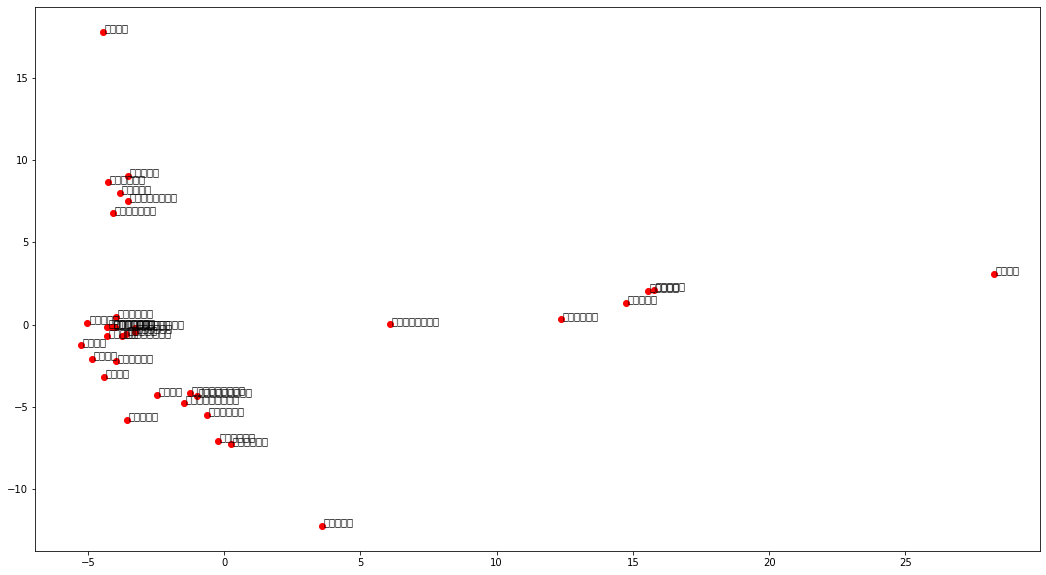

In [55]:
# ছবিটা কিছুটা টেন্সর-ফ্লো এর এমবেডিং প্রজেক্টরের মতো
# কিছু কাজ বাকি আছে

word_vectors = fasttext_model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

সামনে কি করবো? বাংলায় সেন্টিমেন্ট অ্যানালাইসিস।